# Airbnb EDA Script

Importing Tools & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1: Load Dataset

In [2]:
df=pd.read_csv("airnb.csv")

In [3]:
df.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed


# 2: Data Cleaning

Convert Prices To Float

In [4]:
for col in ['Price(in dollar)','Offer price(in dollar)']:
    df[col]=df[col].str.replace(',','').str.extract(r'(\d+\.?\d*)')[0].astype(float)

Extract Numeric Values from "Rating & Review"

In [5]:
df[['Rating','Reviews']]=df['Review and rating'].str.extract(r'([\d.]+)?\s*\(?(\d+)?\)?')
df['Rating']=pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews']=pd.to_numeric(df['Reviews'], errors='coerce')

Standardize 'Number of bed'

In [6]:
df['Beds']=df['Number of bed'].str.extract(r'(\d+)').astype(float)

Remove Duplicates

In [7]:
df.drop_duplicates(inplace=True)

Handle Missing Values

In [8]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())
df['Reviews']=df['Reviews'].fillna(df['Reviews'].median())

Outliers Detection via Boxplot

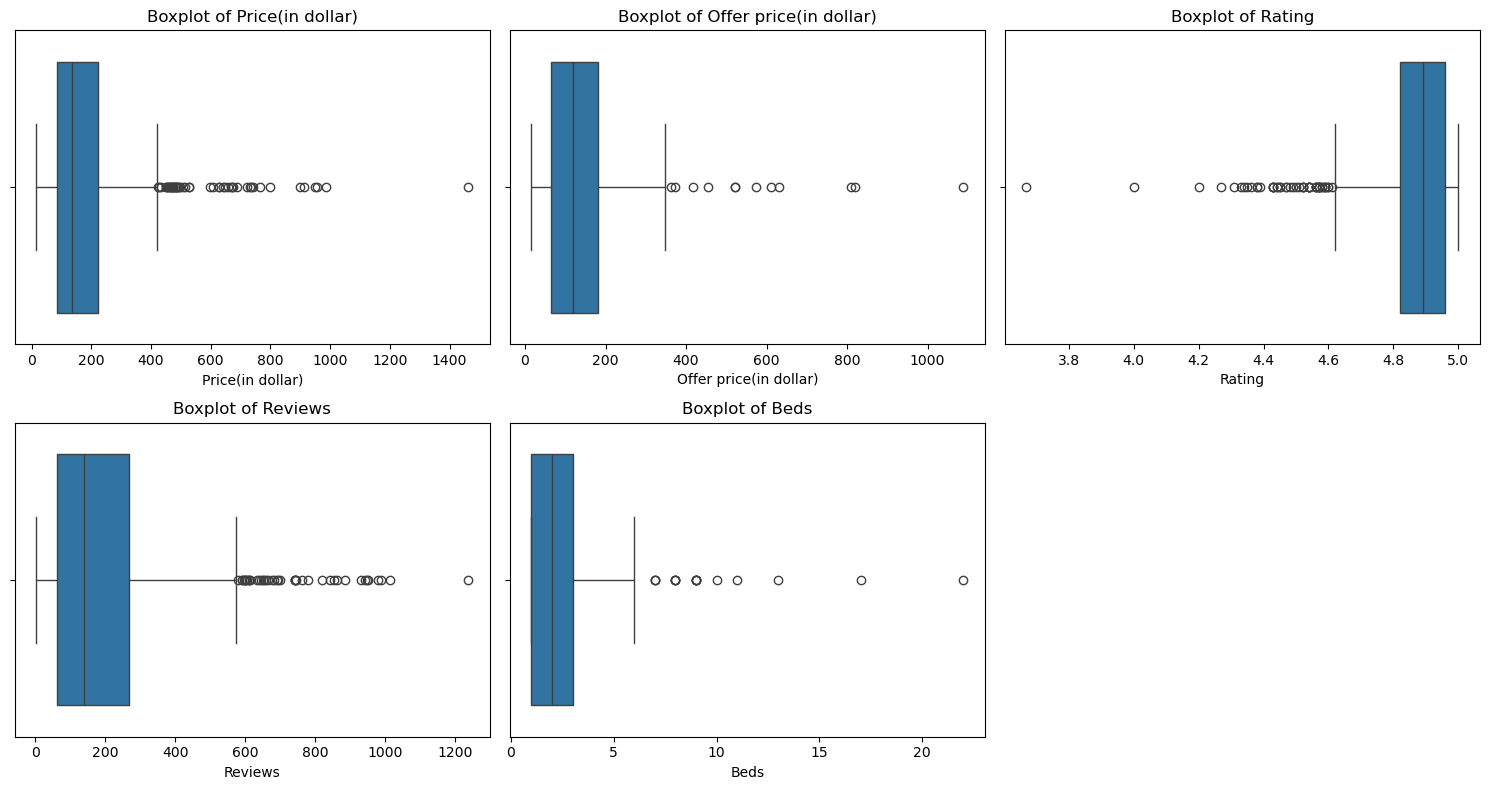

In [12]:
numeric_cols=['Price(in dollar)','Offer price(in dollar)','Rating','Reviews','Beds']
plt.figure(figsize=(15,8))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3: Visualization

A. Bar Chart For Categorical Variable

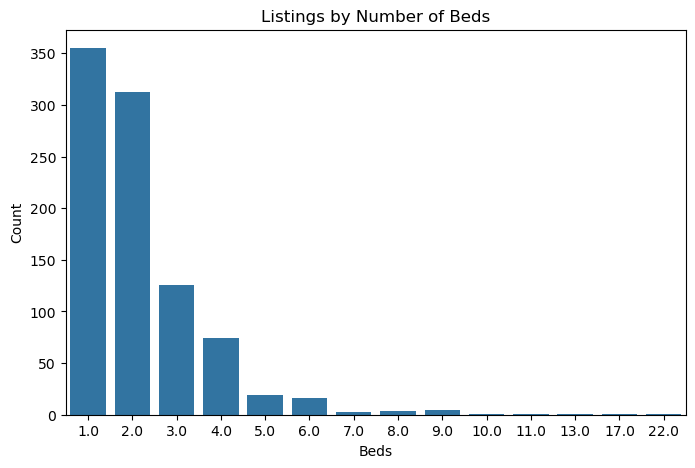

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x= 'Beds')
plt.title('Listings by Number of Beds')
plt.xlabel('Beds')
plt.ylabel('Count')
plt.show()

B. Histogram For Numeric Features

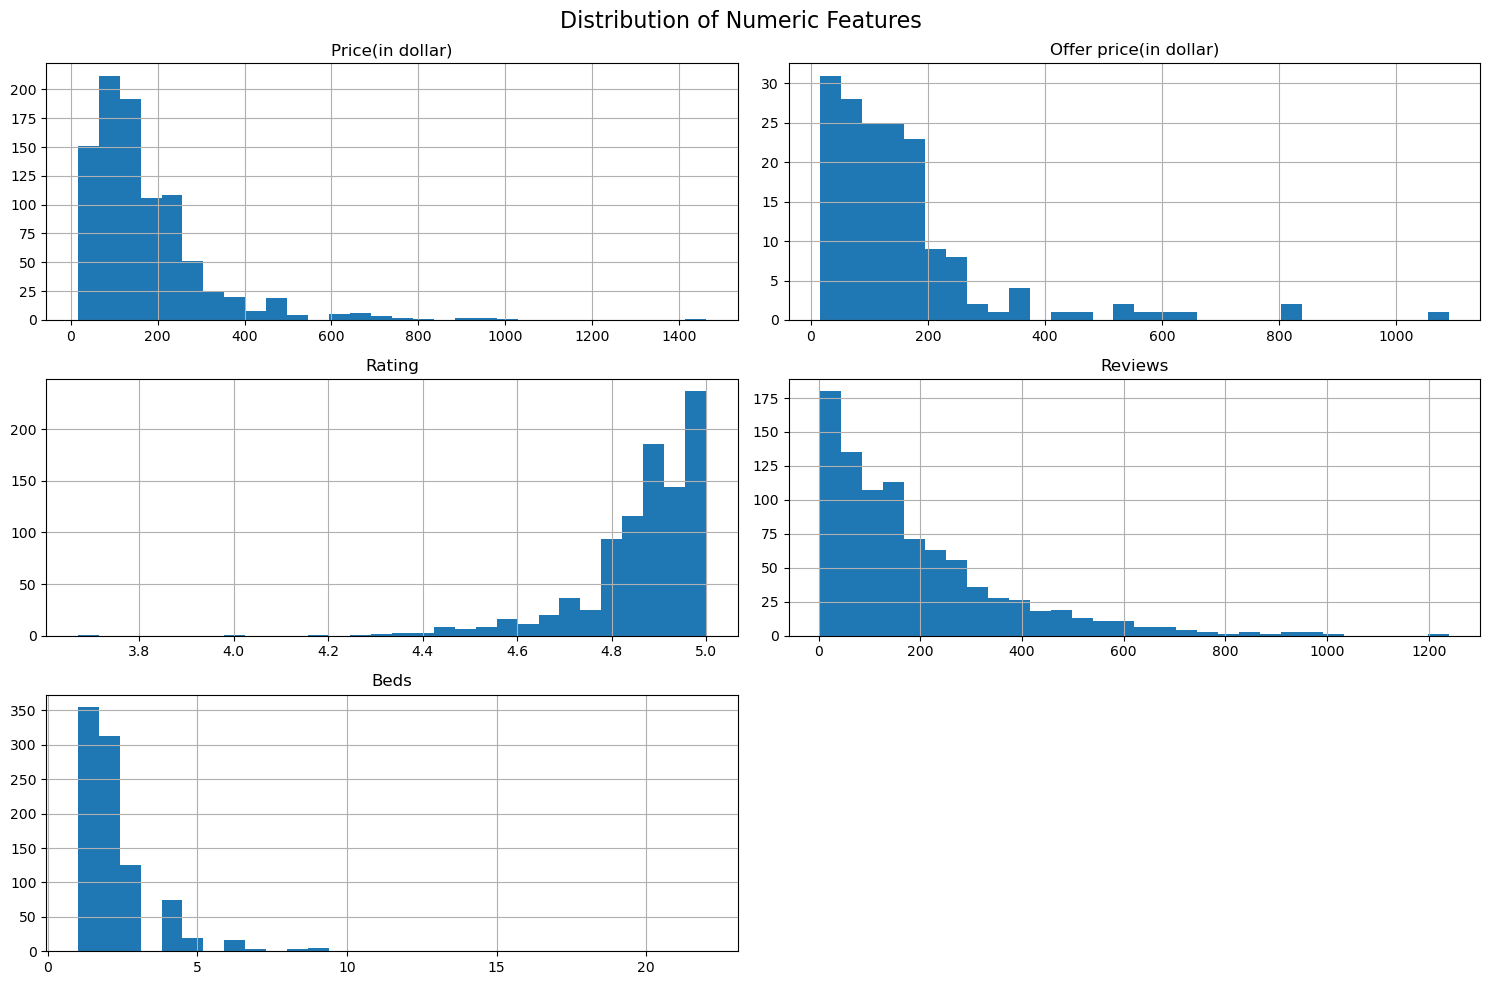

In [14]:
df[numeric_cols].hist(bins=30,figsize=(15,10))
plt.suptitle("Distribution of Numeric Features ",fontsize=16)
plt.tight_layout()
plt.show()

C. Corelation Heatmap

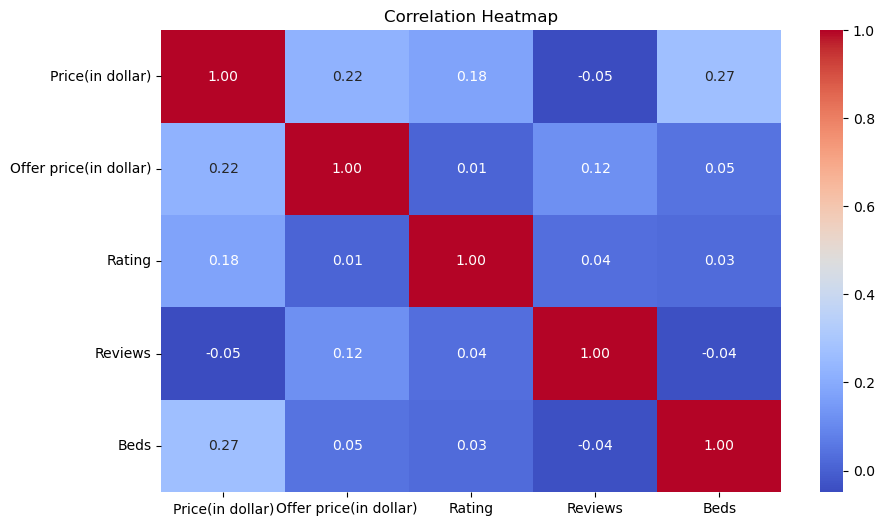

In [16]:
plt.figure(figsize=(10,6))
corr=df[numeric_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Summary Of Insights

In [17]:
print("\n ====== SUMMARY OF INSIGHTS ====== :")
print("- Most listings have between 1 - 4 beds.")
print("- Ratings cluster around 4.8 - 5.0, indicating high satisfaction.")
print("- Prices vary widely; a few outliers are very expensive.")
print("- Threre is a weak correlation between price , reviews , and bed.")
print("- Offer prices are miss for most listings , suggesting selective discounts.")


 ====== SUMMARY OF INSIGHTS ====== :
- Most listings have between 1 - 4 beds.
- Ratings cluster around 4.8 - 5.0, indicating high satisfaction.
- Prices vary widely; a few outliers are very expensive.
- Threre is a weak correlation between price , reviews , and bed.
- Offer prices are miss for most listings , suggesting selective discounts.


In [18]:
print(" =:=:=:= EDA PROCESS COMPLETED =:=:=:= ")

 =:=:=:= EDA PROCESS COMPLETED =:=:=:= 
